# Comparing Timeseries of Transport files from Observational Data
*Akira Di Sandro, 6/25/20*
<br>
In this notebook, I will be plotting time series of transport from different files on the same figure to compare them and make observations.

## 1.  Import packages and Load in data

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import random

In [2]:
from scipy.io import loadmat
x = loadmat('allTransport_SolomonStrait.mat')

## 2. Convert time stamps into legible and usable ones

### a. Legible to humans

In [3]:
datenums = x['time'][0]
# this line below reads matlab datenums and returns datetime in human legible format
timestamps = pd.to_datetime(datenums-719529, unit='D')

### b. Timestamps in vector format for python

In [4]:
# this code reads matlab datenums and returns it in a datetime vector. 
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366)
    return day + dayfrac

In [5]:
py_dt = []

for time in datenums:
    py_dt = np.concatenate([py_dt, [matlab2datetime(int(time))]])
#py_dt

## 3. Plot Transport timeseries

I need the 'string find' code here to find files that I'm interested in.

In [20]:
x['T'][0]

array([ 12.8910476 ,   8.80225101,   3.24539391,  -2.51741866,
        -7.85933446, -12.48677851, -16.00495215, -17.99676509,
       -18.4706279 , -18.00986233, -17.35210306, -16.84211049,
       -16.33865188, -15.60638693, -14.68125309, -13.79138161,
       -12.97432743, -11.90417989, -10.16364956,  -7.70976456,
        -5.06270383,  -3.03513291,  -2.26565998,  -2.98574434,
        -5.11145289,  -8.39842812, -12.40992859, -16.45445198,
       -19.80966791, -22.15875873, -23.74659283, -24.99412663,
       -25.95909216, -26.27086399, -25.60037046, -24.0757151 ,
       -22.18234133, -20.34154546, -18.68831153, -17.20058673,
       -15.86858415, -14.64800117, -13.33955494, -11.65308579,
        -9.43472189,  -6.80990702,  -4.11391456,  -1.71882853,
         0.09000795,   1.17401156,   1.60324141,   1.68330348,
         1.83458913,   2.32954178,   3.09076977,   3.77221265,
         4.09197891,   4.10422129,   4.09943887,   4.20780033,
         4.1265712 ,   3.30906612,   1.47450127,  -1.07

Function where you can give it 2 different files to plot on the same figure. 

In [32]:
# give x as ds, the two indices, and the time array
def plot_two(ds, arr1, arr2, times):
    label1 = ds['flist'][arr1][0][0][0]
    label2 = ds['flist'][arr2][0][0][0]
    trans1 = ds['T'][arr1]
    trans2 = ds['T'][arr2]
    fig, ax = plt.subplots(figsize=(14,8))
    ax.set_ylabel('Transport (Sv)')
    ax.set_xlabel('Time')
    ax.plot(times, trans1, 'b', label=label1)
    ax.plot(times, trans2, 'r', label=label2)
    ax.set_xlim(times[0], times[-1])
    ax.legend()
    ax.grid(True)
    plt.show()
    print(label1)
    print(label2)

In [37]:
x['flist']

array([[(array(['SolomonStrait_geoBotRef_linearXsection_linear2bot_gcur4surf.mat'],
      dtype='<U63'), array(['/Users/marionsofiaalberty/MATLAB/Solomon_Sea/Moorings/Data/Gridded/SolomonStrait'],
      dtype='<U80'), array(['05-Nov-2018 14:31:00'], dtype='<U20'), array([[47652629]], dtype=int32), array([[0]], dtype=uint8), array([[737369.60486111]]))],
       [(array(['SolomonStrait_geoBotRef_linearXsection_linear2bot_linear2surf.mat'],
      dtype='<U65'), array(['/Users/marionsofiaalberty/MATLAB/Solomon_Sea/Moorings/Data/Gridded/SolomonStrait'],
      dtype='<U80'), array(['05-Nov-2018 14:08:21'], dtype='<U20'), array([[47647015]], dtype=int32), array([[0]], dtype=uint8), array([[737369.58913194]]))],
       [(array(['SolomonStrait_geoBotRef_linearXsection_linear2bot_sat4surf.mat'],
      dtype='<U62'), array(['/Users/marionsofiaalberty/MATLAB/Solomon_Sea/Moorings/Data/Gridded/SolomonStrait'],
      dtype='<U80'), array(['05-Nov-2018 14:23:07'], dtype='<U20'), array([[47653043]], dt

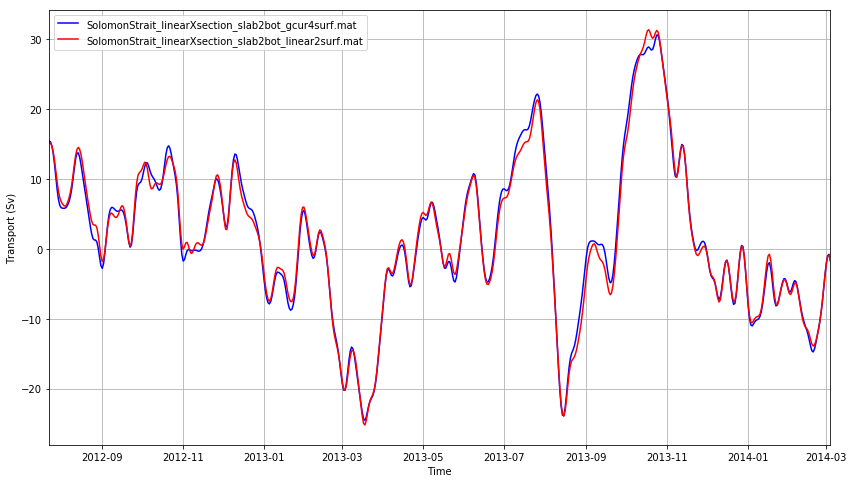

SolomonStrait_linearXsection_slab2bot_gcur4surf.mat
SolomonStrait_linearXsection_slab2bot_linear2surf.mat


In [106]:
plot_two(x, 28, 29, py_dt)

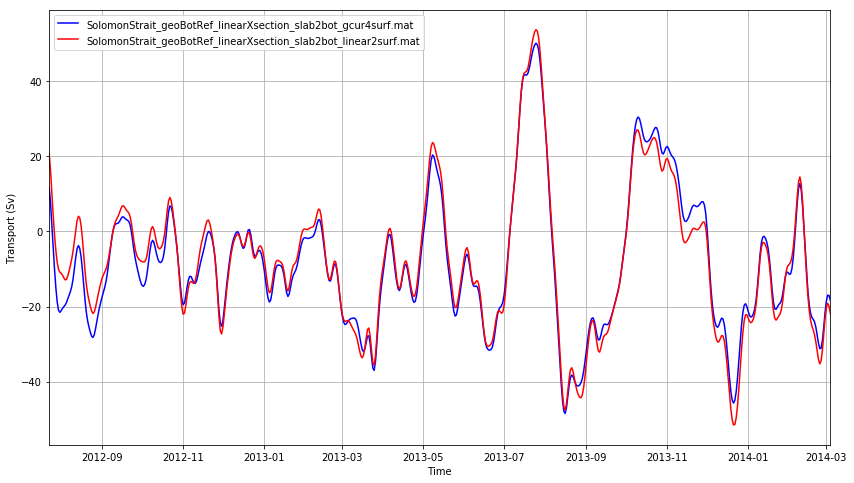

SolomonStrait_geoBotRef_linearXsection_slab2bot_gcur4surf.mat
SolomonStrait_geoBotRef_linearXsection_slab2bot_linear2surf.mat


In [108]:
plot_two(x, 4, 5, py_dt)

## 4. Plot three files to compare

In [84]:
def plot_tres(ds, arr1, arr2, arr3, times):
    label1 = ds['flist'][arr1][0][0][0]
    label2 = ds['flist'][arr2][0][0][0]
    label3 = ds['flist'][arr3][0][0][0]
    trans1 = ds['T'][arr1]
    trans2 = ds['T'][arr2]
    trans3 = ds['T'][arr3]
    fig, ax = plt.subplots(figsize=(14,8))
    ax.set_ylabel('Transport (Sv)')
    ax.set_xlabel('Time')
    ax.plot(times, trans1, 'b', label=label1)
    ax.plot(times, trans2, 'r', label=label2)
    ax.plot(times, trans3, 'g', label=label3)
    ax.set_xlim(times[0], times[-1])
    ax.legend()
    ax.grid(True)
    plt.show()
    print(label1)
    print(label2)
    print(label3)

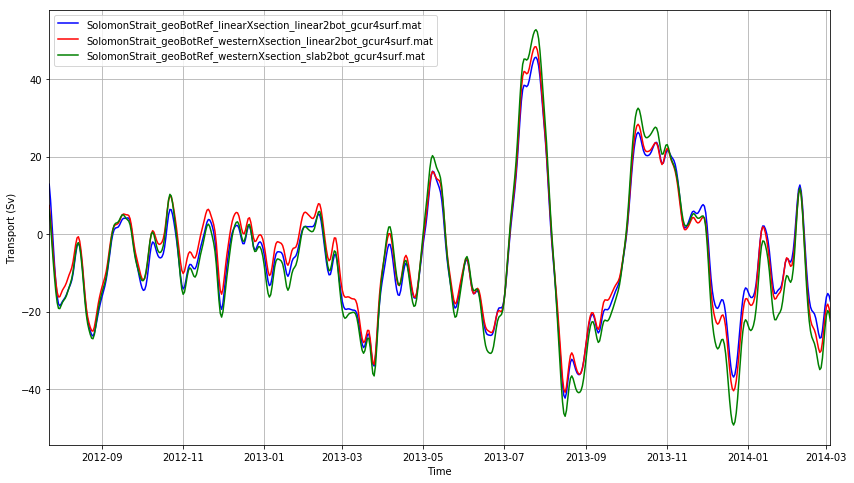

SolomonStrait_geoBotRef_linearXsection_linear2bot_gcur4surf.mat
SolomonStrait_geoBotRef_westernXsection_linear2bot_gcur4surf.mat
SolomonStrait_geoBotRef_westernXsection_slab2bot_gcur4surf.mat


In [68]:
plot_tres(x, 0,16,20, py_dt)

## 5. Plot four together to compare

In [102]:
def plot_four(ds, arr1, arr2, arr3, arr4, times):
    label1 = ds['flist'][arr1][0][0][0]
    label2 = ds['flist'][arr2][0][0][0]
    label3 = ds['flist'][arr3][0][0][0]
    label4 = ds['flist'][arr4][0][0][0]
    trans1 = ds['T'][arr1]
    trans2 = ds['T'][arr2]
    trans3 = ds['T'][arr3]
    trans4 = ds['T'][arr4]
    fig, ax = plt.subplots(figsize=(14,8))
    ax.set_ylabel('Transport (Sv)')
    ax.set_xlabel('Time')
    ax.plot(times, trans1, 'b', label=label1)
    ax.plot(times, trans2, 'r', label=label2)
    ax.plot(times, trans3, 'g--', label=label3)
    ax.plot(times, trans4, 'y--', label=label4)
    ax.set_xlim(times[0], times[-1])
    ax.legend()
    ax.grid(True)
    plt.show()
    print(label1)
    print(label2)
    print(label3)
    print(label4)

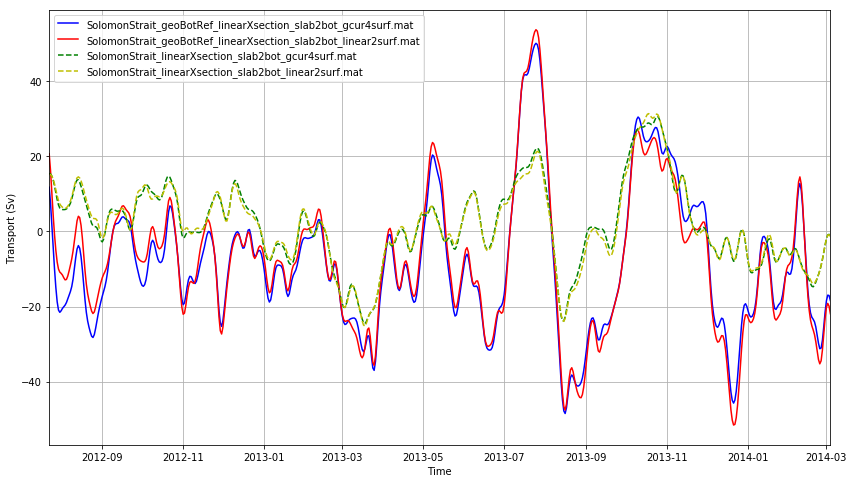

SolomonStrait_geoBotRef_linearXsection_slab2bot_gcur4surf.mat
SolomonStrait_geoBotRef_linearXsection_slab2bot_linear2surf.mat
SolomonStrait_linearXsection_slab2bot_gcur4surf.mat
SolomonStrait_linearXsection_slab2bot_linear2surf.mat


In [109]:
plot_four(x, 4,5,28,29, py_dt)

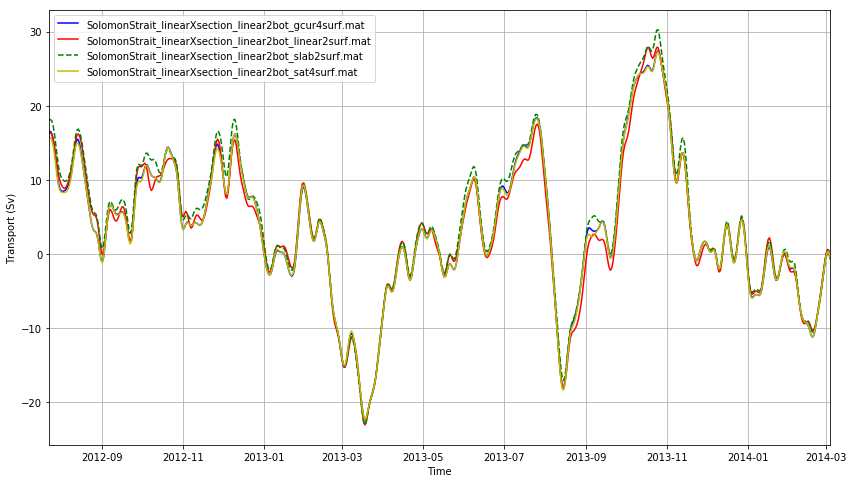

SolomonStrait_linearXsection_linear2bot_gcur4surf.mat
SolomonStrait_linearXsection_linear2bot_linear2surf.mat
SolomonStrait_linearXsection_linear2bot_slab2surf.mat
SolomonStrait_linearXsection_linear2bot_sat4surf.mat


In [99]:
plot_four(x,24,25,27,26, py_dt)